# Exercise #3: neural networks primer (part 1)

## Phase 1 : set it up ##

 1. use case
 2. from logit to neural network
 3. nn structure: weights and biases
 3. activation function
 4. softmax
 5. application


## Phase 2 : make it work ##
 1. loss function
 2. gradient
 3. weight update
 4. learning rate
 5. stochastic gradient descent backpropagation
 6. application

# Phase 1: set it up # 

## 1.1 use case: rating in appstore ##

In [103]:
import pandas as pd

app = pd.read_csv("../../data/AppleStore_prep.csv",index_col=False,sep='\t', encoding='utf-8')
app=app.set_index('track_name')
app.dtypes

size_bytes                       float64
price                            float64
rating_count_tot                 float64
sup_devices.num                  float64
ipadSc_urls.num                  float64
lang.num                         float64
vpp_lic                          float64
currency_USD                       int64
cont_rating_12+                    int64
cont_rating_17+                    int64
cont_rating_4+                     int64
cont_rating_9+                     int64
prime_genre_Book                   int64
prime_genre_Business               int64
prime_genre_Catalogs               int64
prime_genre_Education              int64
prime_genre_Entertainment          int64
prime_genre_Finance                int64
prime_genre_Food & Drink           int64
prime_genre_Games                  int64
prime_genre_Health & Fitness       int64
prime_genre_Lifestyle              int64
prime_genre_Medical                int64
prime_genre_Music                  int64
prime_genre_Navi

In [104]:
app.shape #35 variables

(7197, 36)

## 1.2 from logit to neural network

When running a classification task, we are looking for a probability of a certain outcome. Here is the sigmoid function where *p* stands for target probability:
$$p=\frac{1}{1+e^{-y}}$$

Logistic regression formula would then be:

$$y=ln(\frac{p}{1-p})=\beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}+...+\beta_{k}X_{k}+e$$

Matrix notation will look like:

$$\begin{bmatrix}  y_{1}\\  y_{2}\\   \vdots\\ y_{n}\\ \end{bmatrix}=\begin{bmatrix} 1 & x_{11}&\ldots\ & x_{1,k}\\  1 & x_2\\  \vdots & \vdots\\  1 & x_n&\ldots\ & x_{n,k}\\ \end{bmatrix}\begin{bmatrix}  \beta_{0}\\  \beta_{1}\\   \vdots\\ \beta_{k}\\ \end{bmatrix} +\begin{bmatrix}  e_{1}\\  e_{2}\\   \vdots\\ e_{n} \end{bmatrix}$$

Logistic regression actually represents a one-layer neural network:

<img src="LogtNN.png" alt="logit" style="width: 600px;"/>


Let's present the formula in a slightly more general way:

$$y=WX+b$$

where the W is standing for the **weight** matrix, containing coefficients/betas for respective explanatory variables, and b is an error term or a **bias**

<img src="nnn.png" alt="nn" style="width: 1200px;"/>

So have 35 variables and a target lable with 6 levels. How do we make it a NN task?

 ## 1.3 nn architecture ## 

We will start with so called "vanilla neural network", or ANN.
This is not deep learning yet, as we have just one "hidden layer".
 - a - input layer (number of neurons defined by number of features)
 - a' - hidden layer (number of neurons depends on the task, see best practice)
 - a'' - output layer (number of neurons depends on the type of output, 1 for regression, 2 for binary logistic regression, multiclass by number of classes)

<img src="nn_full.png" alt="fff" style="width: 800px;">


Additionally, every neuron of a hidden layer has an **activation function** that transforms the input. 
For example, if the activation function is $f(x)=x^2$ then with input $x=2$, the neuron will take the value of 4.

However, the usual "go to" functions for neural networks in recent years have been either *sigmoid* or *ReLu*.


## 1.4 activation function ##


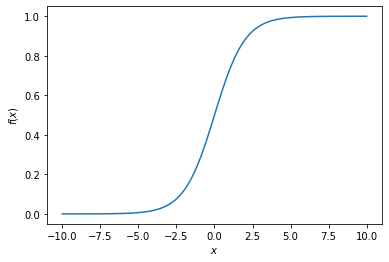

In [22]:
### Sigmoid function ###

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-10, 10, 100)

plt.plot(x, sigmoid(x))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();

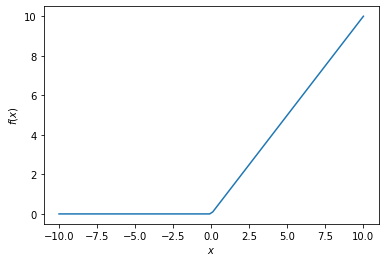

In [23]:
def ReLU(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
plt.plot(x, ReLU(x))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show();
#y = max(0, x)

So we have here a fully connected layer, the connections between layers actually represent **2 weight matrices**:

<img src="nn_w.png" alt="ffcf" style="width: 800px;">

Here is the matrix notation:

<img src="m_notation.png" alt="mn" style="width: 800px;">    

And a single element computation:
$$a'_{0}= f(w_{0,0}a_{0}+w_{0,1}a_{1}+w_{0,2}a_{2}+w_{0,3}a_{3} +...+ b_{0})$$

$$
\begin{pmatrix} 
a'_{0}\\ a'_{1}\\ 
\vdots \\ 
a'_{h}\\
\end{pmatrix} =
f \Bigg(
\begin{pmatrix} 
w_{0,0} & w_{0,1} & \ldots & w_{0,k} \\ 
w_{1,0} & w_{1,1} &\ldots & w_{1,k}\\ 
w_{2,0} & w_{2,1} &\ldots & w_{2,k}\\ 
\vdots & \vdots & \ldots & \vdots\\
w_{h,0} & w_{h,1} & \ldots & w_{h,k}\\
\end{pmatrix}
\begin{pmatrix}
a_{0}\\ a_{1}\\ \vdots\\ a_{k}\\
\end{pmatrix}+
\begin{pmatrix}b_{0}\\  b_{1}\\
\vdots\\
b_{h}\\
\end{pmatrix}
\Bigg)
$$

The resulting output will not quite give us the desired result. 
The above computations will provide us with **scores**, while we are in need of probabilities, 
and not just probabilities, but the distribution of probabilities over the classes of
 our target variable. That's where **softmax** comes in. 

## 1.5 softmax function ##

$$S(x_{i})=\frac{e^{x_{i}}}{\sum_{j} e^{x_{i}}}$$

In [24]:
# As a result of our matrix multiplication we got these:

scores = [-100, -10, -0.5, -0.1, 0, 0.21]

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

print(softmax(scores))
np.round(softmax(scores),4)

[9.93320441e-45 1.21225154e-05 1.61953494e-01 2.41606222e-01
 2.67016170e-01 3.29411991e-01]


array([0.    , 0.    , 0.162 , 0.2416, 0.267 , 0.3294])

In [25]:
#our observation can only be labelled as one class, so the probabilities should sum up to 1, check it
sum(softmax(scores))

1.0

<img src="softmax.png" alt="ffff" style="width: 600px">

Source: [RitchiNg.com](https://www.ritchieng.com/machine-learning/deep-learning/neural-nets/)

## 1.6 application##
Let's try to set up the NN architecture on our own! We have already loaded our data.

In [105]:
# Inspect the data
len(app) # that would be the number of observations

7197

In [106]:
# And here is one observation
app.iloc[5]

size_bytes                      -0.525218
price                           -0.126225
rating_count_tot                -0.061266
sup_devices.num                  2.578809
ipadSc_urls.num                  0.651051
lang.num                        -0.560030
vpp_lic                          0.083642
currency_USD                     1.000000
cont_rating_12+                  0.000000
cont_rating_17+                  0.000000
cont_rating_4+                   1.000000
cont_rating_9+                   0.000000
prime_genre_Book                 0.000000
prime_genre_Business             0.000000
prime_genre_Catalogs             0.000000
prime_genre_Education            0.000000
prime_genre_Entertainment        0.000000
prime_genre_Finance              0.000000
prime_genre_Food & Drink         0.000000
prime_genre_Games                1.000000
prime_genre_Health & Fitness     0.000000
prime_genre_Lifestyle            0.000000
prime_genre_Medical              0.000000
prime_genre_Music                0

In [107]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(app["user_rating"])
encoded_Y = encoder.transform(app["user_rating"])
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y# 6 levels -> 6 columns

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [108]:
app["user_rating"].unique()

array([4., 5., 3., 2., 0., 1.])

In [109]:
data = np.array(app)
X = data[:,:-1]
y = dummy_y.astype(int)
y[5]

array([0, 0, 0, 0, 1, 0])

In [110]:
print(X.shape,y.shape)

(7197, 35) (7197, 6)


### Let's set up the structure of our ANN

In [111]:
# Determine the structure of the NN
inputLayer = 35 # by the number of features - a
hiddenLayer = 50 #hidden layer, as we decided - a'
outputLayer = 6 #output, by the number of levels - a''

To kickstart the NN we need to set up the weight matrices to some numbers. Setting them randomly won't yield good resuls, we will try the uniformly distributed ones for now but in the future we will talk on better ways

<img src="nn_ws.png" alt="ffcf" style="width: 800px;">

In [33]:
# Randomly defining the weights between nodes won't yield a good result 
#weightsInputToHidden = np.random.rand(hiddenLayer,inputLayer)
#weightsHiddenToOutput = np.random.rand(outputLayer, hiddenLayer)
np.random.seed(9)

limit = np.sqrt(6 / (inputLayer + outputLayer)) #will be discussed during the lecture

weightsInputToHidden  = np.random.uniform(-limit, limit, (hiddenLayer, inputLayer)) # W
weightsHiddenToOutput = np.random.uniform(-limit, limit, (outputLayer, hiddenLayer)) # M

biasInputToHidden  = np.ones( (hiddenLayer,1) ) #for sigmoid to pick 0, for ReLu you pick one - b
biasHiddenToOutput = np.ones( (outputLayer,1) ) #  v


We will be inputing just one observation for now. 

In [114]:
#X[5]
app.iloc[5,:]

size_bytes                      -0.525218
price                           -0.126225
rating_count_tot                -0.061266
sup_devices.num                  2.578809
ipadSc_urls.num                  0.651051
lang.num                        -0.560030
vpp_lic                          0.083642
currency_USD                     1.000000
cont_rating_12+                  0.000000
cont_rating_17+                  0.000000
cont_rating_4+                   1.000000
cont_rating_9+                   0.000000
prime_genre_Book                 0.000000
prime_genre_Business             0.000000
prime_genre_Catalogs             0.000000
prime_genre_Education            0.000000
prime_genre_Entertainment        0.000000
prime_genre_Finance              0.000000
prime_genre_Food & Drink         0.000000
prime_genre_Games                1.000000
prime_genre_Health & Fitness     0.000000
prime_genre_Lifestyle            0.000000
prime_genre_Medical              0.000000
prime_genre_Music                0

In [115]:
# We need to ensure that the input comes as an array of correct dimension
print(X[5].shape)
# This will not work since, for matrix multiplication, we need a kx1 vector
inputs = np.array(X[5]).reshape( (35,1) )
inputs.shape # now we have a nice and sweet input vector!

(35,)


(35, 1)

In [37]:
inputs

array([[-0.52521775],
       [-0.12622463],
       [-0.06126572],
       [ 2.57880861],
       [ 0.65105067],
       [-0.56003026],
       [ 0.08364175],
       [ 1.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

In [161]:
# Now we need to make sure our output vectors will be what we want it to be. 
# That is basically the same operation as above
print(y[5].shape)
target = y[5].reshape( (6,1) )
target.shape

(6,)


(6, 1)

In [162]:
# Show matrices of weights
weightsInputToHidden.shape, inputs.shape, weightsHiddenToOutput.shape, target.shape

((50, 35), (35, 1), (6, 50), (6, 1))

Ok, we are all set, let's multiply!

In [165]:
hL_inputs = np.dot(weightsInputToHidden, inputs) + biasInputToHidden
hL_outputs = ReLU(hL_inputs)
hL_outputs.shape

(50, 1)

In [166]:
oL_inputs = np.dot(weightsHiddenToOutput, hL_outputs) + biasHiddenToOutput
oL_inputs
#doesn't look like probabilities, that's because these are our scores

array([[ 1.36172534],
       [-0.69414103],
       [ 0.46249297],
       [ 0.21754509],
       [ 2.93789853],
       [ 1.10027884]])

In [167]:
oL_outputs = softmax(oL_inputs)
oL_outputs

array([[0.13405368],
       [0.01715645],
       [0.05454401],
       [0.04269407],
       [0.64833888],
       [0.1032129 ]])

In [168]:
# and just for verification
np.sum(oL_outputs)

1.0

In [171]:
## So what was the label again?
target

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0]])

Our model is somewhat on the way but still a little uncertain, we need to give it a nudge in the right direction. So how do you usually tell the model it's wrong? You show it the evaluation metric and try to make it better.

To evaluate the the probabilities estimated by the model, we need to compare them with the true values, 
that are one-hot encoded in our case. So we need to compare our outputs to 

[ 0, 0, 0, 0, 1, 0]

You can imagine that we cannot use MSE here, as we are dealing with a certain probability distribution.
Our *loss function* has to grasp the difference between these probabilities. This is where the **cross-entropy loss**
function will come in handy. It is used when the output of a model represents the probability of an outcome, i.e. when the output is a probability distribution. 
It is used as a loss function in neural networks that have softmax activations in the output layer.

*Remark*: in case you are interested, there a nice article (with codes) on the differences between squared-error and cross-entropy
in the context of training neural networks appeared in the [Visual Study magazine](https://visualstudiomagazine.com/articles/2017/07/01/cross-entropy.aspx).

# Phase 2: make it work # 
 1. loss function
 2. gradient
 4. batches
 5. learning rate
 6. stochastic gradient descent
 7. backpropagation

## 2.1 Loss function
### Logistic regression case
Let us revisit classic logistic regression. We build a linear model to distinguish between two classes. So our target variable can only take one of two states $ y \in \{0,1\} $.

With $ w$ denoting the parameters (aka weights) of our logit model and letting observations be indexed by $i = 1, 2, ..., n$, our loss function $J(w)$ has the form:

$$J(w) = \sum_{i=1}^{n} y^{(i)} \log P(y=1) + (1 - y^{(i)}) \log P(y=0)$$
Where P(y) represent the probability of a certain binary outcome

We will however consider another loss function - cross entropy. It is used when the output represents the probability of an outcome, i.e. when the output is a probability distribution. It is used as a loss function in neural networks that have softmax activations in the output layer.

### Cross-entropy 
Entropy (H(y)) is a term from Information Theory. It had a great impact on the field of communication and signifies the optimal number of bits to encode a certain information content ($y_c$ is the probability of the c-th event, symbol or in our case class):

$$H(y) = \sum_c y_c \log \frac{1}{y_c} = -\sum_c y_c \log y_c$$

Now the cross-entropy (H(y,\hat{y})) is the number of bits we'll need if we encode symbols from $y$ using the wrong tool $\hat{y}$. Cross entropy is always bigger or equal to entropy. Mind that $c$ stands for the number of classes. 

$$H(y, \hat{y}) = \sum_c y_c \log \frac{1}{\hat{y}_c} = -\sum_c y_c \log \hat{y}_c$$

Interestingly enough, the The KL divergence that you have encountered before in BADS (uplift random forest) is simply the difference between cross entropy and entropy:
$$\mbox{KL}(y~||~\hat{y})
= \sum_c y_c \log \frac{1}{\hat{y}_c} - \sum_c y_c \log \frac{1}{y_c}
= \sum_c y_c \log \frac{y_c}{\hat{y}_c}$$

We would be calculating the cross-entropy for every pair of true/estimated probabilities and averaging it over the sample or batch (more about it later) - this will be our loss function *L* that we will ultimately want to minimise (class i, smaple j):

$$L=-\frac{1}{N}\sum_i \sum_c y_{i,c} \log(\hat{y}_{i,c})$$

#### CE example
A concrete example is the best way to explain the purely mathematical form of CE. Suppose you have a weirdly shaped
four-sided dice (yes, I know the singular is really "die"). Using some sort of intuition or physics, you predict
that the probabilities of the four sides are (0.20, 0.40, 0.30, 0.10). 
You then roll the dice many thousands of times and determine that the true probabilities are  (0.15, 0.35, 0.25, 0.25). 
Here is how we calculate the CE error of our prediction:

CE prediction error:
-1.0 * [ ln(0.20) * 0.15 + ln(0.40) * 0.35 + ln(0.30) * 0.25 + ln(0.10) * 0.25 ] = 
-1.0 * [ (-1.61)(0.15) + (-0.92)(0.35) + (-1.20)(0.25) + (-2.30)(0.25) ] =
1.44

In [45]:
import numpy as np
ce=-1.0 * (np.log(0.20) * 0.15 + np.log(0.40) * 0.35 + np.log(0.30) * 0.25 + np.log(0.10) * 0.25)
print('Cross entropy error of weird dice prediction is: {:.4f}'.format(ce))

Cross entropy error of weird dice prediction is: 1.4388


Let us apply this idea to our network outputs.

In [179]:
yhat=np.round(oL_outputs, 3) #that's our WX+b run through softmax
print('True label: ',  target.shape)
print(target)
print('Prediction: ', yhat.shape)
print(yhat)

True label:  (6, 1)
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]]
Prediction:  (6, 1)
[[0.134]
 [0.017]
 [0.055]
 [0.043]
 [0.648]
 [0.103]]


In [188]:
# Calculation of cross-entropy loss
L =- sum(target*np.log(yhat))
print(L.item())

0.4338645826298623


In [189]:
# or, if you prefer
L=-1*np.dot(target.T, np.log(yhat))
print(L.item())

0.4338645826298623


This is the number we want the machine to minimize! But how?
We ca not change our input, we cannot change our labels, what we can adjust are **weights and biases** - these are the parameters of our neural network. So we need to change our **W, M, b and v** and check if the loss decreases.

NB: number of neurons in the hidden layer AND number of hidden layers are meta-parameters and certainly can be experimented with, we will discuss it further down the course.

The most efficient way to move around the function slope is to find the derivative.

In our naive example, we are dealing with 1 example only while we have 6 classes. In practice, these numbers, the number of examples and output classes would be much larger, making the calculation of the derivative of the loss function computationally demanding. 

And that was the point when everybody almost gave up on neural networks. Spoiler alert: the solutions were **stochastic gradient descent and backpropagation**.


## 2.2 Gradient 
The gradient ( $\nabla$) is a vector operation which operates on a scalar function to produce a vector whose magnitude is the maximum rate of change of the function at the point of the gradient and which is pointed in the direction of that maximum rate of change. 

Well, put in easier terms, gradient is a **vector of partial derivatives**. Why would we need it? Because we need the derivative of this:
$$L=-\frac{1}{N}\sum\sum y\log(softmax(M(relu(Wx+b))+v)),$$

where the functions $s$ and $r$ stand for softmax, and relu, respectively.


We want to adjust every estimation of y (yhat) so as to minimize the loss function. For that we would deduct a gradient of the loss function from it and continue doing these iterations until we reach the local minimum. 
$$L_{t+1} =L_t - \eta \cdot \nabla L(W, M, b, v)$$

You can think of of gradient as a list of directionsfor improvement (of course, imagining moving in 10000 directions is hard):
$$ \nabla L(W,M,b,v)=\begin{bmatrix}  \frac{dL}{dW}\\ \frac{dL}{dM}\\ \frac{dL}{db}\\ \frac{dL}{dv}\end{bmatrix}$$

Normally it would be a result of averaging over all observations that went through with forward pass, but again- we have just one this time.

In [152]:
%%html
<iframe src="https://giphy.com/embed/8tvzvXhB3wcmI" width="1000" height="400" frameBorder="0" class="giphy-embed" allowFullScreen></iframe>
<p><a href="https://giphy.com/gifs/deep-learning-8tvzvXhB3wcmI">via GIPHY</a></p>

### Gradient descent example
For illustration purpose, we will try to find the local minimum of the function $ f(x) = \left(x-4\right)^2 $. In this case, the gradient is a simple derivative: $2 \left(x-4\right)$.

The example draws on: https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1

In [192]:
cur_x = 10 # Randomly guessed starting point 
rate = 0.1 # Learning rate

# Let's impose two stopping conditions, a max. number
# of iterations and a minimum step size
precision = 0.000001 # threshold for the step size
previous_step_size = 1 # change of x in the prev. step
max_iters = 10 # maximum number of iterations
iters = 0 #iteration counter

df = lambda x: 2*(x-4) #Gradient of our function '

while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) # gradient descent step
    previous_step_size = abs(cur_x - prev_x) # change in x
    iters = iters+1 #iteration count
    if (iters%5 == 0.0):
        print("Iteration {:02d} with X equal to {:.4f}".format(iters,cur_x)) #Print iterations
    
print("The local minimum occurs at: {:.10f}".format(cur_x))

Iteration 05 with X equal to 5.9661
Iteration 10 with X equal to 4.6442
The local minimum occurs at: 4.6442450944


## 2.3 updating weights
The following codes sketch gradient descent for neural network learning. For simplicity, we consider the squared-error loss function. Its derivative is very easy and more handy compared to cross-entropy. However, the same concepts apply to the cross-entropy loss function or yet other loss functions.

We also need the derivative of our activation function, which was ReLu, and the softmax function.

In [193]:
def loss_derivative(output, y): #check the derivation if interested https://sefiks.com/2017/12/17/a-gentle-introduction-to-cross-entropy-loss-function/
    return output - y

def ReLU_derivative(x):
    return (x>0)*1.0

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [196]:
# DELETE
oL_errors = target - oL_outputs
oL_errors 

array([[-0.13405368],
       [-0.01715645],
       [-0.05454401],
       [-0.04269407],
       [ 0.35166112],
       [-0.1032129 ]])

In [259]:
loss_derivative(oL_outputs, target) * ReLU_derivative(oL_outputs)

array([[ 0.51047741],
       [ 0.02737673],
       [ 0.04699093],
       [ 0.05200084],
       [ 0.27632279],
       [-0.9131687 ]])

Before going on, let's remind us of our network architecture and the shape of relevant variables. 

In [260]:
print(weightsHiddenToOutput.shape)
print(weightsInputToHidden.shape)
print(oL_errors.shape)
print(hL_outputs.shape)

(6, 50)
(50, 35)
(6, 1)
(50, 1)


In [261]:
# gradient for the weights between hidden and output layer
gradient_HiddenToOutput = loss_derivative(oL_outputs, target) * ReLU_derivative(oL_outputs)
oL_errors = gradient_HiddenToOutput
# gradient for the weights between input and hidden layers
gradient_InputToHidden = np.dot(weightsHiddenToOutput.T, oL_errors) * ReLU_derivative(hL_outputs)

In [262]:
# update the matrix for weights between hidden and output layers
# define the learning rate
learningRate = 0.0001

biasHiddenToOutput -= learningRate * gradient_HiddenToOutput
biasInputToHidden -= learningRate * gradient_InputToHidden

weightsHiddenToOutput -= learningRate * np.dot(gradient_HiddenToOutput, np.transpose(hL_outputs))
weightsInputToHidden -= learningRate * np.dot(gradient_InputToHidden, np.transpose(inputs)   )

## 2.4 stochastic gradient descent and backpropagation##

Apart from derivatives, avereging over the whole training dataset might be costly. That is why **stochastic** gradient descent was introduced. It basically means that instead of using the full training set, the algorithm will only use a certain  random **batch** (size of this batch is a metaparameter like the number of neurons). This introduces a certain "slopinness" to the process but allows to run the **backpropagation** much faster. After many iterations, we expect to converge to the sample parameters anyway. Below, we exemplify backpropagation for our simple neural network. To that end, we require another important concept, an **epoch**. An epoch describes on run of the entire data set through the NN. 

Essentially, Backpropagation is an algorithm for computing the gradient in a multidimensional space. You can find a very description of the algorithm in the [ML Glossary](https://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html). Here is a picture illustrating the idea.


<img src="nn_color.png" alt="Backpropagation" style="width: 800px;"/>

## 2.5 Updating for each observation in the data (the original stochastic gradient descent)

In [263]:
learningRate = 0.001
epochs = 10 # how many times do we have to run the training set through the network

input_dim = X.shape[1] # number of variables
n_classes = y.shape[1]  # number of classes (i.e., 6 user ratings one-hot encoded)

In [264]:
iteration=0

while iteration < epochs:
    
    # Put all the steps done before in a loop:
    # Process one observation per iteration 
    squared_residuals = np.zeros(X.shape[0]) # to keep track of the loss
    for i in range(X.shape[0]):

        inputs  = np.array(X[i]).reshape( (input_dim,1) ) # select current case i
        target = y[i].reshape( (n_classes,1) ) # and its target value
                
        # Compute the forward pass through the network all the way up to the final output  
        hL_inputs = np.dot(weightsInputToHidden, inputs) + biasInputToHidden
        hL_outputs = ReLU(hL_inputs)
        oL_inputs = np.dot(weightsHiddenToOutput, hL_outputs) + biasHiddenToOutput 
        oL_outputs = softmax(oL_inputs) # final output: probabilistic prediction for case i 

        # Compute the gradients:
        # gradient for the weights between hidden and output layers
        gradient_HiddenToOutput = loss_derivative(oL_outputs, target) * ReLU_derivative(oL_outputs)
        oL_errors = gradient_HiddenToOutput
        
        # gradient for the weights between input and hidden layers
        gradient_InputToHidden = np.dot(weightsHiddenToOutput.T, oL_errors) * ReLU_derivative(hL_outputs)

        # Perform gradient descent update
        biasHiddenToOutput -= learningRate * gradient_HiddenToOutput
        biasInputToHidden  -= learningRate * gradient_InputToHidden

        weightsHiddenToOutput -= learningRate * np.dot(gradient_HiddenToOutput, np.transpose(hL_outputs))
        weightsInputToHidden  -= learningRate * np.dot(gradient_InputToHidden, np.transpose(inputs))
        
        # Store residual 
        squared_residuals[i] = np.sum((target-oL_outputs)**2)
        
    # Development of the loss as average over obs-level losses
    print('Epoch {} with loss {:.4f}'.format(iteration, np.mean(squared_residuals)))
    iteration += 1


Epoch 0 with loss 0.4054
Epoch 1 with loss 0.4052
Epoch 2 with loss 0.4049
Epoch 3 with loss 0.4046
Epoch 4 with loss 0.4044
Epoch 5 with loss 0.4041
Epoch 6 with loss 0.4039
Epoch 7 with loss 0.4037
Epoch 8 with loss 0.4034
Epoch 9 with loss 0.4032


### Let's check the results! ##

In [265]:
# Extract some 'test' data
X_test = data[78:178,:-1]
y_test = dummy_y[78:178].astype(int)
y_test = np.argmax(dummy_y[78:178], axis=1)

In [266]:
# scorecard of the network
confusion_matrix = np.zeros( (6,6), dtype="int" )

# go through all the observations in the test data set
for i in range(len(y_test)):
    # compute the network output (using the trained weights)
    inputs = np.array(X_test[i]).reshape( (35,1) )

    hL_inputs = np.dot(weightsInputToHidden, inputs) + biasInputToHidden
    hL_outputs = ReLU(hL_inputs)
    oL_inputs = np.dot(weightsHiddenToOutput, hL_outputs) + biasHiddenToOutput
    oL_outputs = softmax(oL_inputs)

    # determine most likely class
    label = np.argmax(oL_outputs)

    confusion_matrix[label, y_test[i]] += 1

In [267]:
# scorecard of the network
confusion_matrix = np.zeros( (6,6), dtype="int" )
true_labels = np.argmax(y, axis=1)
pred_labels = np.zeros_like(true_labels)
# go through all the observations in the test data set
for i in range(len(y)):
    # compute the network output (using the trained weights)
    inputs = np.array(X[i]).reshape( (35,1) )

    hL_inputs = np.dot(weightsInputToHidden, inputs) + biasInputToHidden
    hL_outputs = ReLU(hL_inputs)
    oL_inputs = np.dot(weightsHiddenToOutput, hL_outputs) + biasHiddenToOutput
    oL_outputs = softmax(oL_inputs)

    # determine most likely class
    pred_labels[i] = np.argmax(oL_outputs)

    confusion_matrix[pred_labels[i], true_labels[i]] += 1

In [268]:
confusion_matrix

array([[ 566,   17,  102,  105,  530,   97],
       [   0,    0,    0,    0,    0,    0],
       [  10,    1,   18,    7,   21,    7],
       [   2,    0,    0,    3,    0,    0],
       [ 347,   26,  235,  268, 4426,  382],
       [   4,    0,    3,    0,   14,    6]])

In [269]:
# Calculate percentage correctly classified
pcc = np.trace(confusion_matrix) / len(y)
print('Classification accuracy of trained network: {:.2f}'.format(pcc))

Classification accuracy of trained network: 0.70


Ok, not too bad for our first neural network and a lot better than random guessing ...

In [270]:
guessed_class = np.random.randint(0,6, y.shape[0])
m=pd.crosstab(guessed_class, true_labels)
m

col_0,0,1,2,3,4,5
row_0,,,,,,
0,144,12,61,61,803,71
1,169,7,48,75,840,79
2,163,5,74,54,859,77
3,134,7,64,62,846,86
4,154,4,62,75,818,95
5,165,9,49,56,825,84


In [271]:
print('Classification accuracy of randomly guessing classes: {:.2f}.'.format(np.trace(m.to_numpy()) / len(y)))

Classification accuracy of randomly guessing classes: 0.17.


## 2.6 Learning rate
Learning rate is a **hyper-parameter** that controls how much we are adjusting the weights of our network with respect the loss gradient. 
Lower LR takes more time but allows better allocation of local minimum, higher LR allows faster calculations but drastic jumps do not always yield good results. 
        $$ newWeights=OldWeights - learningRate *gradientOfOldWeights$$ 

<img src="http://cs231n.github.io/assets/nn3/learningrates.jpeg" alt="Drcng" style="width: 400px;"/>Img Credit: cs231n

One can improve the results of computations significantly if learning rate is set well. However, learning rate might not remain the same throughout the training. The concpet of cyclical learning rate was introduced by Leslie N.Smith in 2015, it conveys a certain schedule when the LR starts with small values and increases (either linearly or exponentially) at each iteration. Learning rate decay would provide an alternative, it would bare the same problem though - when to decay the LR (step decay, exponential decay, others). In practice, step decay is preferred by many practitioners as hyperparameters it involves (the fraction of decay and the step timings in units of epochs) are more interpretable. 

learning_rate = 0.1
decay_rate = learning_rate / epochs

## 2.7 Momentum

$$\Delta  W_{i} = -learningRate  \frac{\partial L}{\partial W} + \mu  \Delta W_{i-1}$$


Second part that contains $\mu$ is a momentum term here (or coefficient), that defines the effect of the accumulated past gradient (we are aking an exponentially weighted moving average of accumulated gradient). You can think of it as a certain velocity control mechanism. When we reach flatter areas, it will increase the speed of convergence, while dampening oscillations when reaching high curvatures. If learning rate measures how much the current situation affects the next step, while momentum measures how much past steps affect the next step. 

Conventional values to set for momentum is 0.5 increasing to 0.9, in case of cross validation can be set to values such as [0.5, 0.9, 0.95, 0.99]

**Nesterov Momentum** is a slightly different version of the momentum update that has recently been gaining popularity. It is set as a metaparameter in basic Keras application that we will see in the next tutorial. In simplified terms, Nesterov momentum gives gradient a better 'nudge' as it containes a 'lookahead' information. 

# Further study

I strongly recommend watching this video from 3blue1brown on neural network training using gradient descent and backpropagation: https://www.youtube.com/watch?v=tIeHLnjs5U8&list=PLLMP7TazTxHrgVk7w1EKpLBIDoC50QrPS&index=4

In my opinion, this is the single most intuitive explanation available on the internet.